In [1]:
from dotenv import load_dotenv
load_dotenv( override=True)

True

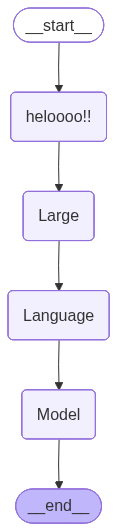

In [14]:
from IPython.display import Image, display

from typing import Any
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

class State(TypedDict):
    # The operator.add reducer fn makes this append-only
    state: str

class ReturnNodeValue:
    def __init__(self, node_secret: str):
        self._value = node_secret

    def __call__(self, state: State) -> Any:
        print(f"Adding {self._value} to {state['state']}")
        return {"state": [self._value]}

# Add nodes
builder = StateGraph(State)

# Initialize each node with node_secret 
builder.add_node("heloooo!!", ReturnNodeValue("I'm A"))
builder.add_node("Large", ReturnNodeValue("I'm B"))
builder.add_node("Language", ReturnNodeValue("I'm C"))
builder.add_node("Model", ReturnNodeValue("I'm D"))

# Flow
builder.add_edge(START, "heloooo!!")
builder.add_edge("heloooo!!", "Large")
builder.add_edge("Large", "Language")
builder.add_edge("Language", "Model")
builder.add_edge("Model", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [3]:
graph.invoke({"state": []})

Adding I'm A to []
Adding I'm B to ["I'm A"]
Adding I'm C to ["I'm B"]
Adding I'm D to ["I'm C"]


{'state': ["I'm D"]}

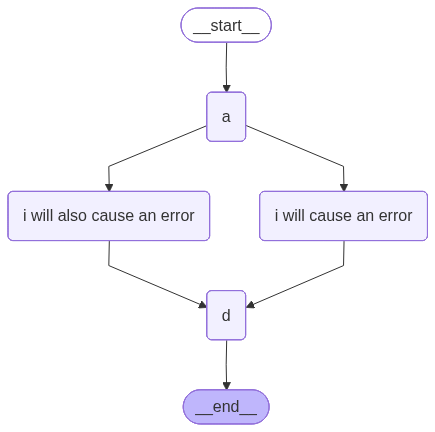

In [7]:
builder = StateGraph(State)

# Initialize each node with node_secret 
builder.add_node("a", ReturnNodeValue("I'm A"))
builder.add_node("i will cause an error", ReturnNodeValue("I'm B"))
builder.add_node("i will also cause an error", ReturnNodeValue("I'm C"))
builder.add_node("d", ReturnNodeValue("I'm D"))

# Flow
builder.add_edge(START, "a")
builder.add_edge("a", "i will cause an error")
builder.add_edge("a", "i will also cause an error")
builder.add_edge("i will cause an error", "d")
builder.add_edge("i will also cause an error", "d")
builder.add_edge("d", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [8]:
from langgraph.errors import InvalidUpdateError
try:
    graph.invoke({"state": []})
except InvalidUpdateError as e:
    print(f"An error occurred: {e}")

Adding I'm A to []
Adding I'm C to ["I'm A"]
Adding I'm B to ["I'm A"]
An error occurred: At key 'state': Can receive only one value per step. Use an Annotated key to handle multiple values.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_CONCURRENT_GRAPH_UPDATE


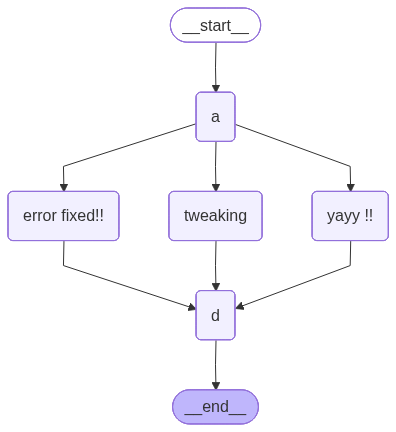

In [12]:
import operator
from typing import Annotated

class State(TypedDict):
    # The operator.add reducer fn makes this append-only
    state: Annotated[list, operator.add]
builder = StateGraph(State)

# Initialize each node with node_secret 
builder.add_node("a", ReturnNodeValue("I'm A"))
builder.add_node("error fixed!!", ReturnNodeValue("I'm B"))
builder.add_node("yayy !!", ReturnNodeValue("I'm C"))
builder.add_node("d", ReturnNodeValue("I'm D"))
builder.add_node("tweaking", ReturnNodeValue("I represent the tweaking !! "))

# Flow
builder.add_edge(START, "a")
builder.add_edge("a", "error fixed!!")
builder.add_edge("a", "yayy !!")
builder.add_edge("a", "tweaking")
builder.add_edge("error fixed!!", "d")
builder.add_edge("yayy !!", "d")
builder.add_edge("tweaking", "d")
builder.add_edge("d", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [13]:
graph.invoke({"state": []})

Adding I'm A to []
Adding I'm B to ["I'm A"]
Adding I represent the tweaking !!  to ["I'm A"]
Adding I'm C to ["I'm A"]
Adding I'm D to ["I'm A", "I'm B", 'I represent the tweaking !! ', "I'm C"]


{'state': ["I'm A", "I'm B", 'I represent the tweaking !! ', "I'm C", "I'm D"]}

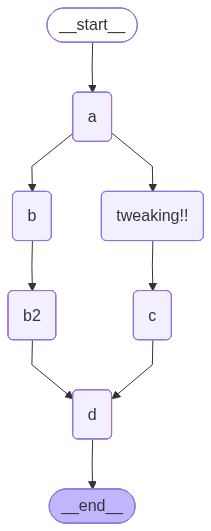

In [17]:
builder = StateGraph(State)

# Initialize each node with node_secret 
builder.add_node("a", ReturnNodeValue("I'm A"))
builder.add_node("b", ReturnNodeValue("I'm B"))
builder.add_node("b2", ReturnNodeValue("I'm B2"))
builder.add_node("c", ReturnNodeValue("I'm C"))
builder.add_node("tweaking!!", ReturnNodeValue("I'm just here for funn !!"))
builder.add_node("d", ReturnNodeValue("I'm D"))

# Flow
builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("a", "tweaking!!")
builder.add_edge("tweaking!!", "c")
builder.add_edge("b", "b2")
builder.add_edge(["b2", "c"], "d")
builder.add_edge("d", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [18]:
graph.invoke({"state": []})

Adding I'm A to []
Adding I'm B to ["I'm A"]
Adding I'm just here for funn !! to ["I'm A"]
Adding I'm B2 to ["I'm A", "I'm B", "I'm just here for funn !!"]
Adding I'm C to ["I'm A", "I'm B", "I'm just here for funn !!"]
Adding I'm D to ["I'm A", "I'm B", "I'm B2", "I'm C", "I'm just here for funn !!"]


{'state': ["I'm A",
  "I'm B",
  "I'm B2",
  "I'm C",
  "I'm D",
  "I'm just here for funn !!"]}

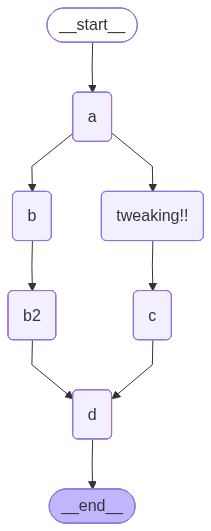

In [16]:
def sorting_reducer(left, right):
    """ Combines and sorts the values in a list"""
    if not isinstance(left, list):
        left = [left]

    if not isinstance(right, list):
        right = [right]
    
    return sorted(left + right, reverse=False)

class State(TypedDict):
    # sorting_reducer will sort the values in state
    state: Annotated[list, sorting_reducer]

# Add nodes
builder = StateGraph(State)

# Initialize each node with node_secret 
builder.add_node("a", ReturnNodeValue("I'm A"))
builder.add_node("b", ReturnNodeValue("I'm B"))
builder.add_node("b2", ReturnNodeValue("I'm B2"))
builder.add_node("c", ReturnNodeValue("I'm C"))
builder.add_node("tweaking!!", ReturnNodeValue("I'm just here for funn !!"))
builder.add_node("d", ReturnNodeValue("I'm D"))

# Flow
builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("a", "tweaking!!")
builder.add_edge("tweaking!!", "c")
builder.add_edge("b", "b2")
builder.add_edge(["b2", "c"], "d")
builder.add_edge("d", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [19]:
graph.invoke({"state": []})

Adding I'm A to []
Adding I'm B to ["I'm A"]
Adding I'm just here for funn !! to ["I'm A"]
Adding I'm B2 to ["I'm A", "I'm B", "I'm just here for funn !!"]
Adding I'm C to ["I'm A", "I'm B", "I'm just here for funn !!"]
Adding I'm D to ["I'm A", "I'm B", "I'm B2", "I'm C", "I'm just here for funn !!"]


{'state': ["I'm A",
  "I'm B",
  "I'm B2",
  "I'm C",
  "I'm D",
  "I'm just here for funn !!"]}

In [20]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o", temperature=0.5) 

C:\Users\Aniket\Documents\Clg\LLM - part 2\myllm\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
class State(TypedDict):
    question: str
    answer: str
    context: Annotated[list, operator.add]
    

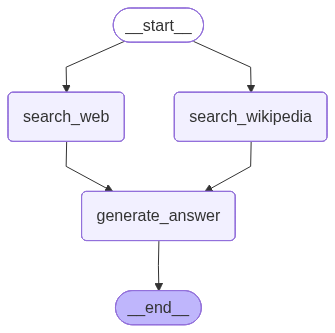

In [22]:
from langchain_core.messages import HumanMessage, SystemMessage

from langchain_community.document_loaders import WikipediaLoader
from langchain_community.tools import TavilySearchResults

def search_web(state):
    
    """ Retrieve docs from web search """

    # Search
    tavily_search = TavilySearchResults(max_results=3)
    search_docs = tavily_search.invoke(state['question'])

     # Format
    formatted_search_docs = "\n\n---\n\n".join(
        [
            f'<Document href="{doc["url"]}">\n{doc["content"]}\n</Document>'
            for doc in search_docs
        ]
    )

    return {"context": [formatted_search_docs]} 

def search_wikipedia(state):
    
    """ Retrieve docs from wikipedia """

    # Search
    search_docs = WikipediaLoader(query=state['question'], 
                                  load_max_docs=2).load()

     # Format
    formatted_search_docs = "\n\n---\n\n".join(
        [
            f'<Document source="{doc.metadata["source"]}" page="{doc.metadata.get("page", "")}">\n{doc.page_content}\n</Document>'
            for doc in search_docs
        ]
    )

    return {"context": [formatted_search_docs]} 

def generate_answer(state):
    
    """ Node to answer a question """

    # Get state
    context = state["context"]
    question = state["question"]

    # Template
    answer_template = """Answer the question {question} using this context: {context}"""
    answer_instructions = answer_template.format(question=question, 
                                                       context=context)    
    
    # Answer
    answer = llm.invoke([SystemMessage(content=answer_instructions)]+[HumanMessage(content=f"Answer the question.")])
      
    # Append it to state
    return {"answer": answer}

# Add nodes
builder = StateGraph(State)

# Initialize each node with node_secret 
builder.add_node("search_web",search_web)
builder.add_node("search_wikipedia", search_wikipedia)
builder.add_node("generate_answer", generate_answer)

# Flow
builder.add_edge(START, "search_wikipedia")
builder.add_edge(START, "search_web")
builder.add_edge("search_wikipedia", "generate_answer")
builder.add_edge("search_web", "generate_answer")
builder.add_edge("generate_answer", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [23]:
result = graph.invoke({"question": " is virat kohli the best odi batsmen ?"})
result['answer'].content

C:\Users\Aniket\AppData\Local\Temp\ipykernel_15184\3921850799.py:11: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the `langchain-tavily package and should be used instead. To use it run `pip install -U `langchain-tavily` and import as `from `langchain_tavily import TavilySearch``.
  tavily_search = TavilySearchResults(max_results=3)


"Based on the provided context, Virat Kohli is widely regarded as one of the greatest ODI batsmen of all time. He has an impressive record, including being ranked number one in the ICC rankings for ODI batsmen in 2013, achieving numerous centuries, and having a strong average in both run-chases and when batting first. Kohli is often compared to other legendary cricketers like Sachin Tendulkar, and he has been closing the gap in terms of achievements. While some experts suggest he may become the best ODI batter if he continues his form and achieves further milestones, it is subjective to definitively label him as the best given the presence of other greats in the sport's history. However, his accomplishments and accolades certainly place him in the conversation for being one of the best ODI batsmen."

In [24]:
if 'google.colab' in str(get_ipython()):
    raise Exception("Unfortunately LangGraph Studio is currently not supported on Google Colab")

In [25]:
from langgraph_sdk import get_client
client = get_client(url="http://127.0.0.1:2024")

In [27]:
thread = await client.threads.create()
input_question = {"question": "is virat kohli the best odi batsmen ?"}
async for event in client.runs.stream(thread["thread_id"], 
                                      assistant_id="parallelization", 
                                      input=input_question, 
                                      stream_mode="values"):
    # Check if answer has been added to state  
    if event.data is not None:
        answer = event.data.get('answer', None)
        if answer:
            print(answer['content'])